<a href="https://colab.research.google.com/github/Muhthoriqas/Fish_Weight_Prediction_Linear_And_Polynomial_Regression/blob/main/Fish_Weight_Prediction_Linear_%26_Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fish Weight Prediction Using Linear & Polynomial Regression

Mid Project Machine Learning

Anggota Kelompok:
1. Muhammad Thoriq Ali Said             | H071201077
2. Muhammad Amirul Haq                  | H071201078
3. Umar Sabirin                         | H071201059
4. Bob Chrismansyah Pata'dungan Kabanga | H071201087

# Importing Libraries

In [30]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Fetch Dataset From Kaggle

In [31]:
!pip install -q kaggle
from google.colab import files

# Upload Token API Kaggle
files.upload()

In [32]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!kaggle datasets download -d aungpyaeap/fish-market --unzip

In [33]:
df = pd.read_csv('Fish.csv')
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


# Understanding the Data

## Data Description

* Species: Species name of fish
* Weight: Weight of fish in gram
* Length1: Vertical length in cm
* Length2: Diagonal length in cm
* Length3: Cross length in cm
* Height: Height in cm
* Width: Diagonal width in cm

## Data Info

In [34]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [35]:
# Mengubuah nama attribut Lenght1, Lenght2, dan Lenght3 agar tidak bigung
df = df.rename(columns={'Length1':'VerticalLen','Length2':'DiagonalLen','Length3':'CrossLen'})
df.head()

,Species,Weight,VerticalLen,DiagonalLen,CrossLen,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [36]:
# Melihat Banyaknya baris dan kolom dari dataset
df.shape

(159, 7)

In [37]:
# Melihat tiap tipe data dari feature dataset
df.dtypes

Species         object
Weight         float64
VerticalLen    float64
DiagonalLen    float64
CrossLen       float64
Height         float64
Width          float64
dtype: object

Dataset berisi 159 baris dan 7 kolom, di mana 6 kolom adalah Numerik dan 1 adalah Kategori.

In [38]:
df.describe(include='all')

,Species,Weight,VerticalLen,DiagonalLen,CrossLen,Height,Width
count,159,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
unique,7,NaN,NaN,NaN,NaN,NaN,NaN
top,Perch,NaN,NaN,NaN,NaN,NaN,NaN
freq,56,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,NaN,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,NaN,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,NaN,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,NaN,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,NaN,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500


## Check Corellation


In [39]:
df.corr()

,Weight,VerticalLen,DiagonalLen,CrossLen,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
VerticalLen,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
DiagonalLen,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
CrossLen,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


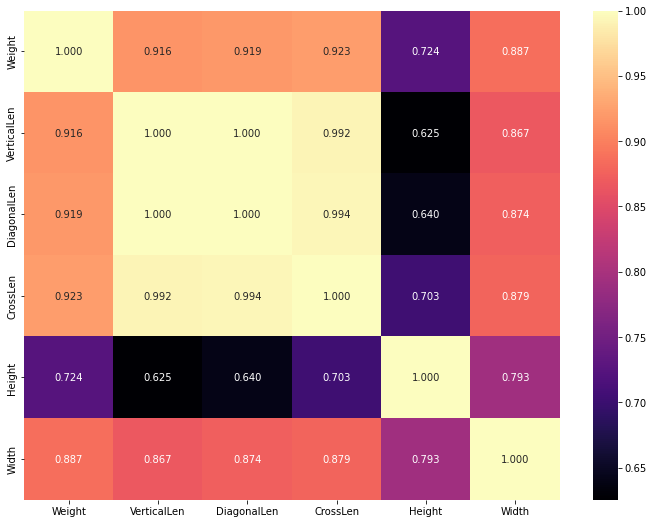

In [40]:
plt.figure(figsize=(12,9))
sns.heatmap(df.corr(), annot = True, cmap='magma',fmt='.3f')
plt.show()

Membaca Matriks Korelasi
* Koefisien korelasi berkisar dari -1 hingga +1
* Tanda(+/-) menunjukkan arah dan jumlah menunjukkan kekuatan korelasi
* +1.00 berarti hubungan positif yang sempurna
*0,00 berarti tidak ada hubungan
* -1.00 berarti hubungan negatif sempurna


In [41]:
df = df.drop(['Species','VerticalLen'	,'DiagonalLen','Height','Width'], axis=1)
df.head(3)

,Weight,CrossLen
0,242.0,30.0
1,290.0,31.2
2,340.0,31.1


# Preprocessing


##Check Missing Value

In [42]:
df.isnull().sum()

Weight      0
CrossLen    0
dtype: int64

## Check Duplicate Value

In [43]:
print("Sebelum data duplicate di drop:")
df.count()

Sebelum data duplicate di drop:


Weight      159
CrossLen    159
dtype: int64

In [44]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (5, 2)


In [45]:
duplicate_rows_df = df[df.duplicated(keep=False)]
print(duplicate_rows_df)

     Weight  CrossLen
7     390.0      35.0
9     500.0      36.2
11    500.0      36.2
14    600.0      37.2
15    600.0      37.2
16    700.0      38.3
54    390.0      35.0
86    120.0      23.5
87    120.0      23.5
113   700.0      38.3


In [46]:
df = df.drop_duplicates()

In [47]:
print("Sesudah data duplicate di drop: ")
df.count()

Sesudah data duplicate di drop: 


Weight      154
CrossLen    154
dtype: int64

## Check Not Logic Data

In [48]:
df[df.Weight <= 0]


,Weight,CrossLen
40,0.0,22.8


In [49]:
print("Ukuran dataset sebelum baris 40 di drop" ,df.shape)

Ukuran dataset sebelum baris 40 di drop (154, 2)


In [50]:
df = df.drop([40])
print("Ukuran dataset sesuah baris 40 di drop" ,df.shape)

Ukuran dataset sesuah baris 40 di drop (153, 2)


# Model Creation

In [51]:
X = np.array(df.iloc[:,1])
y = np.array(df.iloc[:,0])

In [52]:
p = round(80*len(X)/100)

X_train = X[:p]
y_train = y[:p]

X_test = X[p:]
y_test = y[p:]

## Linear Regression

In [53]:
import matplotlib.pyplot as plt
from scipy import stats

slope, intercept, r, p, std_err = stats.linregress(X_train, y_train)
def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, X_train))

In [ ]:
for i in range(20):
  print((X_test[i], y_test[i]), myfunc(X_test[i]))

In [55]:
scoreLinear = r**2
print("Score R2 Dari Model Linear Regression :")
scoreLinear

Score R2 Dari Model Linear Regression :


0.9121115518339744

## Polynomial Regression

In [56]:
mymodel2 = np.poly1d(np.polyfit(X_train, y_train, 3))

myline = np.linspace(0,50)

In [57]:
from sklearn.metrics import r2_score

scorePoly = r2_score(y_train, mymodel2(X_train))
print("Score R2 Dari Model Polynomial Regression :")
scorePoly

Score R2 Dari Model Polynomial Regression :


0.9651765559184052

# Perbandingan Linear Dan Poly

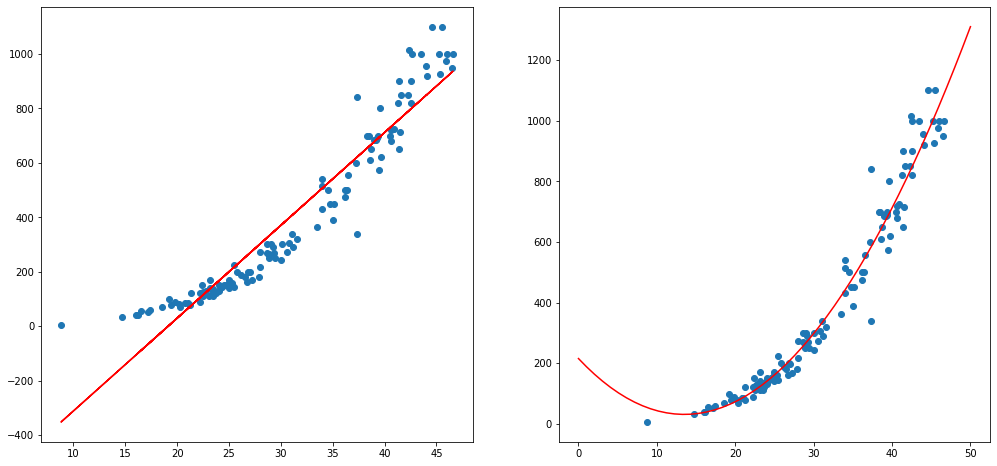

In [58]:
plt.figure(figsize=(17,8))
plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train)
plt.plot(X_train, mymodel, color='red')

plt.subplot(1, 2, 2)
plt.scatter(X_train, y_train)
plt.plot(myline, mymodel2(myline), color='red')
plt.show() 